In [ ]:
### import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.dates as mdates
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt


# prophet by Facebook
from fbprophet import Prophet
from pmdarima import auto_arima


In [2]:
df_store=pd.read_csv('/Users/yuqidai/Downloads/rossmann-store-sales/store.csv')
df=pd.read_csv('/Users/yuqidai/Downloads/rossmann-store-sales/train.csv', 
               parse_dates = True, low_memory = False, index_col = 'Date')

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
df.index.min(),df.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [5]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
df.head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1
2015-07-31,6,5,5651,589,1,1,0,1
2015-07-31,7,5,15344,1414,1,1,0,1
2015-07-31,8,5,8492,833,1,1,0,1
2015-07-31,9,5,8565,687,1,1,0,1


In [7]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['WeekOfYear'] = df.index.weekofyear
df.loc[(df['Month']==12)|(df['Month']==1)|(df['Month']==2),'Season']='winter'
df.loc[(df['Month']==3)|(df['Month']==4)|(df['Month']==5),'Season']='spring'
df.loc[(df['Month']==6)|(df['Month']==7)|(df['Month']==8),'Season']='summer'
df.loc[(df['Month']==9)|(df['Month']==10)|(df['Month']==11),'Season']='fall'

df['SalePerCustomer'] = df['Sales']/df['Customers']

In [8]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,Season,SalePerCustomer
Date,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,summer,9.482883
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,summer,9.702400
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,summer,10.126675
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,summer,9.342457
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,summer,8.626118


In [9]:
df1=pd.merge(df,df_store,how='left',on='Store')

In [10]:
df1[['Sales','Customers','CompetitionDistance','SalePerCustomer']].describe()

,Sales,Customers,CompetitionDistance,SalePerCustomer
count,1.017209e+06,1.017209e+06,1.014567e+06,844340.000000
mean,5.773819e+03,6.331459e+02,5.430086e+03,9.493619
std,3.849926e+03,4.644117e+02,7.715324e+03,2.197494
min,0.000000e+00,0.000000e+00,2.000000e+01,0.000000
25%,3.727000e+03,4.050000e+02,7.100000e+02,7.895563
50%,5.744000e+03,6.090000e+02,2.330000e+03,9.250000
75%,7.856000e+03,8.370000e+02,6.890000e+03,10.899729
max,4.155100e+04,7.388000e+03,7.586000e+04,64.957854


In [11]:
(df1.shape[0]-df1.count())*100/df1.shape[0] #percentage of missing

Store                         0.000000
DayOfWeek                     0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
Year                          0.000000
Month                         0.000000
Day                           0.000000
WeekOfYear                    0.000000
Season                        0.000000
SalePerCustomer              16.994443
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
dtype: float64

In [12]:
df1[pd.isna(df1['SalePerCustomer'])]['Customers'].mean()

0.0

In [13]:
df1['SalePerCustomer'].fillna(value=0,inplace=True)

In [14]:
df1['competition']=1
df1.loc[pd.isna(df1['CompetitionDistance']), 'competition']=0

In [15]:
df1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,Season,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,competition
0,1,5,5263,555,1,1,0,1,2015,7,31,31,summer,9.482883,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1
1,2,5,6064,625,1,1,0,1,2015,7,31,31,summer,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",1
2,3,5,8314,821,1,1,0,1,2015,7,31,31,summer,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1
3,4,5,13995,1498,1,1,0,1,2015,7,31,31,summer,9.342457,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,1
4,5,5,4822,559,1,1,0,1,2015,7,31,31,summer,8.626118,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,1


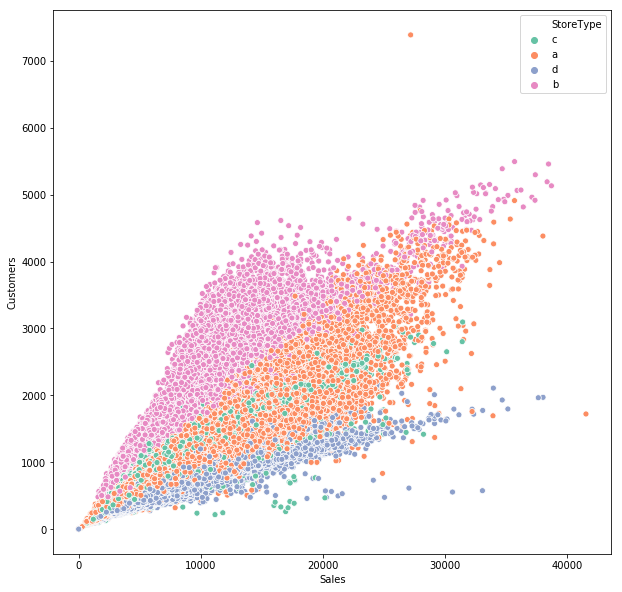

In [16]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="Sales", y="Customers", hue="StoreType",data=df1,palette="Set2")

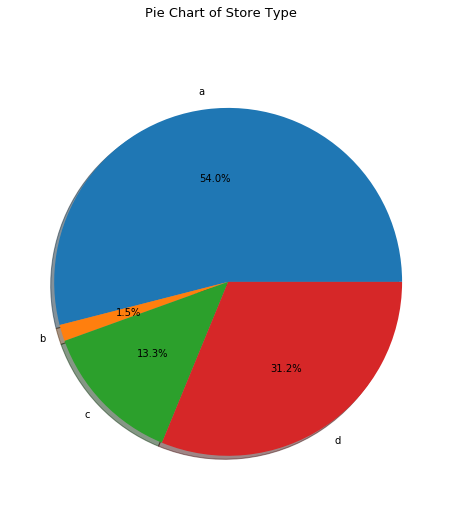

In [17]:
plt.figure(1, figsize=(8,8))

source_pie = plt.pie(df_store.groupby('StoreType').size().values
                     , labels=df_store.groupby('StoreType').size().index, 
                     autopct='%1.1f%%', shadow=True)

plt.suptitle('Pie Chart of Store Type', fontsize=13)

plt.show()

[Text(0, 0.5, 'Store'),
 Text(0, 1.5, 'DayOfWeek'),
 Text(0, 2.5, 'Sales'),
 Text(0, 3.5, 'Customers'),
 Text(0, 4.5, 'Open'),
 Text(0, 5.5, 'Promo'),
 Text(0, 6.5, 'SchoolHoliday'),
 Text(0, 7.5, 'Year'),
 Text(0, 8.5, 'Month'),
 Text(0, 9.5, 'Day'),
 Text(0, 10.5, 'WeekOfYear'),
 Text(0, 11.5, 'SalePerCustomer'),
 Text(0, 12.5, 'CompetitionDistance'),
 Text(0, 13.5, 'CompetitionOpenSinceMonth'),
 Text(0, 14.5, 'CompetitionOpenSinceYear'),
 Text(0, 15.5, 'Promo2'),
 Text(0, 16.5, 'Promo2SinceWeek'),
 Text(0, 17.5, 'Promo2SinceYear'),
 Text(0, 18.5, 'competition')]

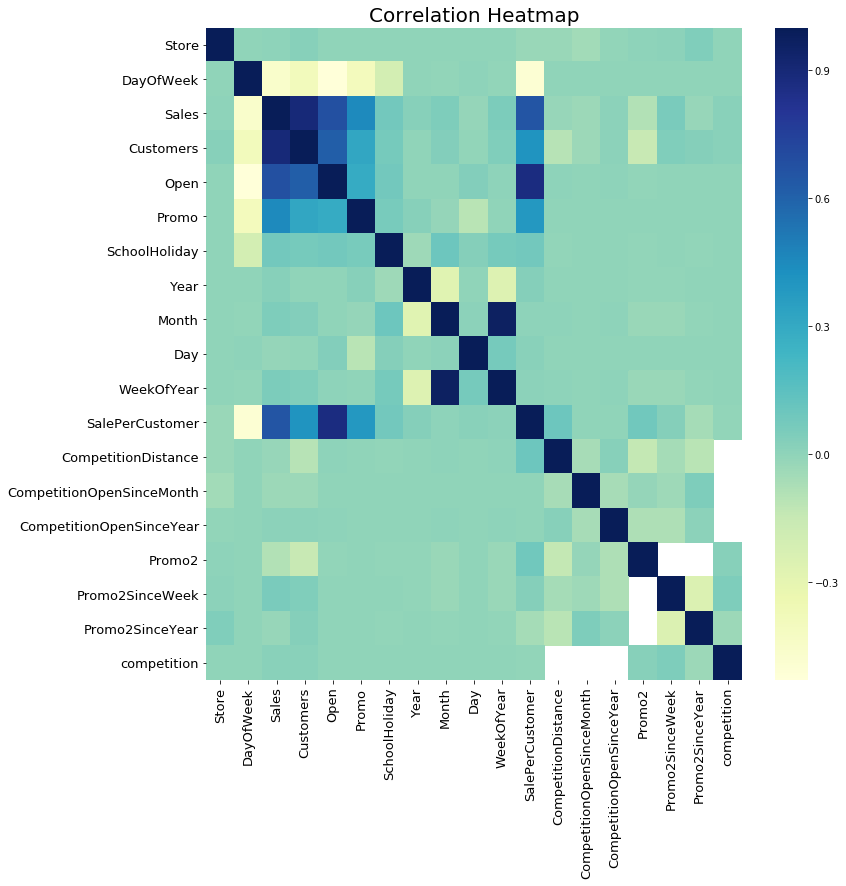

In [18]:
corr=df1.corr()
#Check out the Correlation Headmap
plt.figure(figsize=(12,12))
p = sns.heatmap(corr, cmap="YlGnBu")
p.set_title('Correlation Heatmap', fontsize=20)
p.set_xticklabels(p.get_xticklabels(),fontsize=13)
p.set_yticklabels(p.get_yticklabels(),fontsize=13)

In [21]:
df1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,Season,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,competition
0,1,5,5263,555,1,1,0,1,2015,7,31,31,summer,9.482883,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1
1,2,5,6064,625,1,1,0,1,2015,7,31,31,summer,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",1
2,3,5,8314,821,1,1,0,1,2015,7,31,31,summer,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1
3,4,5,13995,1498,1,1,0,1,2015,7,31,31,summer,9.342457,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,1
4,5,5,4822,559,1,1,0,1,2015,7,31,31,summer,8.626118,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,1


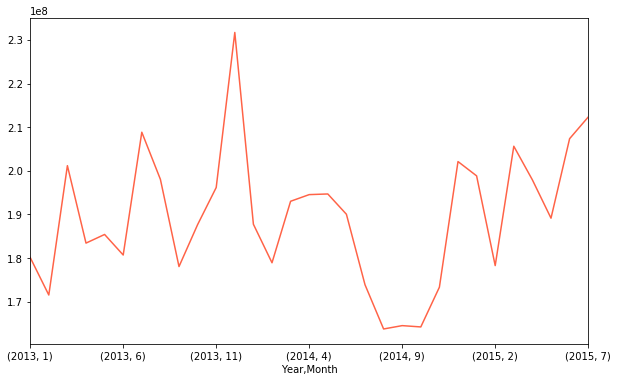

In [19]:
plt.figure(figsize=(10,6))
df1.groupby(['Year','Month'])['Sales'].sum().plot(color = 'tomato')

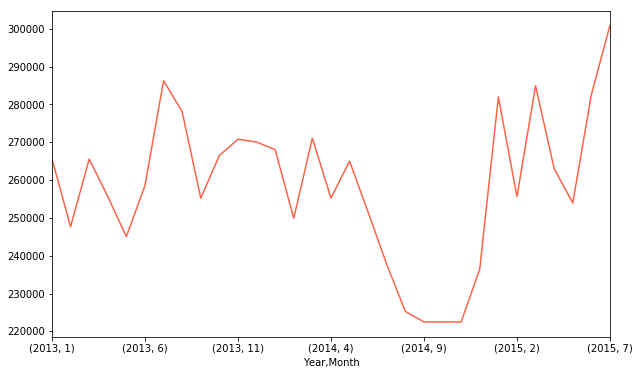

In [20]:
plt.figure(figsize=(10,6))
df1.groupby(['Year','Month'])['SalePerCustomer'].sum().plot(color = 'tomato')

In [21]:
df1[df1['Assortment']=='b'].groupby('StoreType').size()

StoreType
b    8294
dtype: int64

In [22]:
df1.groupby('StoreType')[['Sales','Customers','Promo','SalePerCustomer','Promo2','Open','CompetitionDistance']].mean()

,Sales,Customers,Promo,SalePerCustomer,Promo2,Open,CompetitionDistance
StoreType,,,,,,,
a,5738.179710,659.034880,0.381606,7.329461,0.467501,0.828598,5166.453217
b,10058.837334,1987.720846,0.381933,5.045870,0.285913,0.983133,1066.058117
c,5723.629246,673.265894,0.381789,7.121365,0.498816,0.825621,3516.699503
d,5641.819243,501.434892,0.381213,9.326423,0.570473,0.826987,6959.874812


In [23]:
df1.groupby('Assortment')[['Sales','Customers','Promo','SalePerCustomer','Promo2','Open','CompetitionDistance']].mean()

,Sales,Customers,Promo,SalePerCustomer,Promo2,Open,CompetitionDistance
Assortment,,,,,,,
a,5481.026096,619.164636,0.381379,7.558109,0.497227,0.827822,4398.776526
b,8553.931999,2046.361828,0.381722,4.121054,0.432120,0.990113,1190.817458
c,6058.676567,624.222733,0.381666,8.313561,0.505572,0.829896,6679.063818


In [24]:
df1.groupby('Season')[['Sales','Customers','Promo','SalePerCustomer','Promo2','Open']].mean()

,Sales,Customers,Promo,SalePerCustomer,Promo2,Open
Season,,,,,,
fall,5703.284567,639.797534,0.379791,7.826283,0.480976,0.841721
spring,5670.291213,620.560632,0.398551,7.667226,0.512108,0.805271
summer,5858.302700,641.009106,0.387783,8.094535,0.497006,0.849478
winter,5861.521046,635.337883,0.356357,7.954832,0.504527,0.831643


In [25]:
df1.groupby('Month')[['Sales','Customers','Promo','SalePerCustomer','Promo2','Open']].mean()

,Sales,Customers,Promo,SalePerCustomer,Promo2,Open
Month,,,,,,
1,5465.395529,601.617172,0.376348,7.866232,0.512113,0.832671
2,5645.253150,626.715129,0.357143,8.042086,0.512108,0.856748
3,5784.578871,629.401958,0.408602,7.923162,0.512108,0.829162
4,5738.866916,630.612945,0.400000,7.712215,0.512108,0.814459
5,5489.639973,601.991263,0.387097,7.367752,0.512108,0.772487
6,5760.964375,624.794091,0.366667,7.898683,0.512108,0.822880
7,6064.915711,656.629781,0.419355,8.407362,0.491943,0.872313
8,5693.016554,642.496979,0.372384,7.920826,0.480976,0.856223
9,5570.246033,634.438699,0.363740,7.767740,0.480976,0.850894


In [26]:
df1.groupby('StateHoliday')[['Sales','Customers','Promo','SalePerCustomer','Promo2','Open']].mean()

,Sales,Customers,Promo,SalePerCustomer,Promo2,Open
StateHoliday,,,,,,
0,5947.483893,651.819833,0.382579,8.121662,0.499771,0.855320
a,290.735686,43.817670,0.367769,0.258187,0.539289,0.034255
b,214.311510,36.561883,0.500000,0.137003,0.512108,0.021674
c,168.733171,27.174390,0.000000,0.108577,0.480976,0.017317


In [27]:
df1.groupby('DayOfWeek')[['Sales','Customers','Promo','SalePerCustomer','Promo2','Open']].mean()

,Sales,Customers,Promo,SalePerCustomer,Promo2,Open
DayOfWeek,,,,,,
1,7809.044510,813.065791,0.537276,9.406471,0.500643,0.950459
2,7005.244467,760.984615,0.532596,9.481922,0.500281,0.988309
3,6555.884138,721.639666,0.532592,9.252783,0.500278,0.974400
4,6247.575913,697.541486,0.531935,8.638349,0.500730,0.923199
5,6723.274305,743.150742,0.531935,8.971573,0.500730,0.950598
6,5847.562599,657.112237,0.000000,9.216725,0.500643,0.995357
7,204.183189,35.786817,0.000000,0.160346,0.500643,0.024826


In [28]:
df1.groupby('Promo')[['Sales','Customers','SalePerCustomer','Promo2','Open']].mean()

,Sales,Customers,SalePerCustomer,Promo2,Open
Promo,,,,,
0,4406.050805,517.823542,6.643544,0.500950,0.743084
1,7991.152046,820.098815,9.885065,0.499938,0.971181


In [29]:
df1.groupby('SchoolHoliday')[['Sales','Customers','SalePerCustomer','Promo2','Open']].mean()

,Sales,Customers,SalePerCustomer,Promo2,Open
SchoolHoliday,,,,,
0,5620.979034,617.645174,7.725410,0.502175,0.815015
1,6476.522207,704.412941,8.592045,0.493157,0.899494


In [30]:
df1.groupby('Open')[['Sales','Customers','SalePerCustomer','Promo2']].mean()

,Sales,Customers,SalePerCustomer,Promo2
Open,,,,
0,0.000000,0.000000,0.000000,0.509747
1,6955.514291,762.728395,9.493034,0.498684


In [31]:
pd.plotting.register_matplotlib_converters()

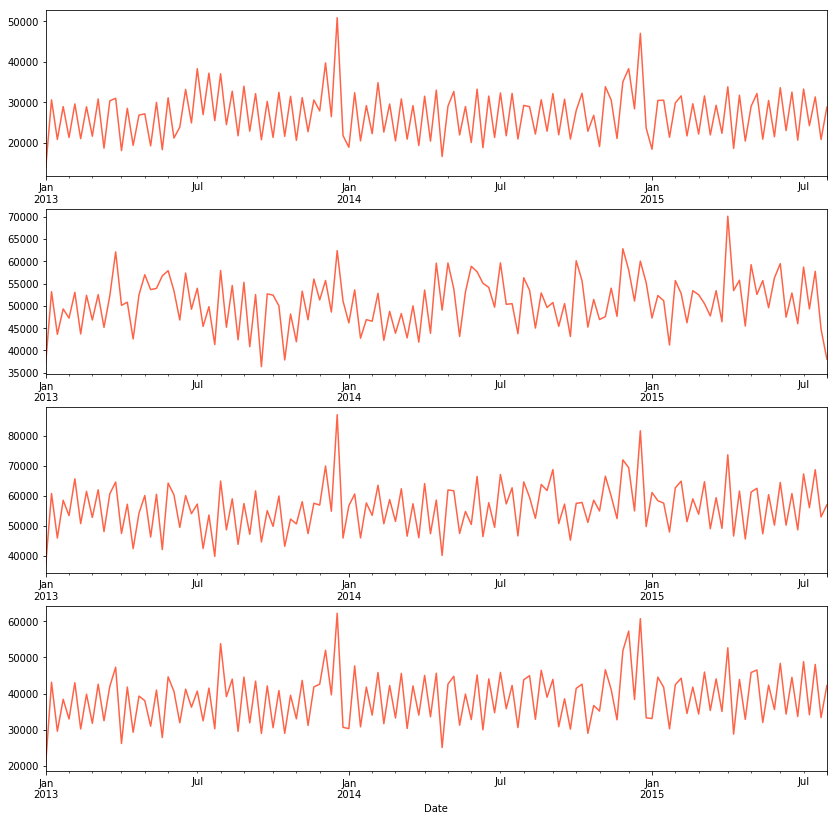

In [32]:
# store types
df['Sales'] = df['Sales'] * 1.0

sales_a = df[df.Store == 5]['Sales']
sales_b = df[df.Store == 85]['Sales']
sales_c = df[df.Store == 4]['Sales']
sales_d = df[df.Store == 15]['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (14, 14))

# store types
sales_a.resample('W').sum().plot(color = 'tomato', ax = ax1)
sales_b.resample('W').sum().plot(color = 'tomato', ax = ax2)
sales_c.resample('W').sum().plot(color = 'tomato', ax = ax3)
sales_d.resample('W').sum().plot(color = 'tomato', ax = ax4)

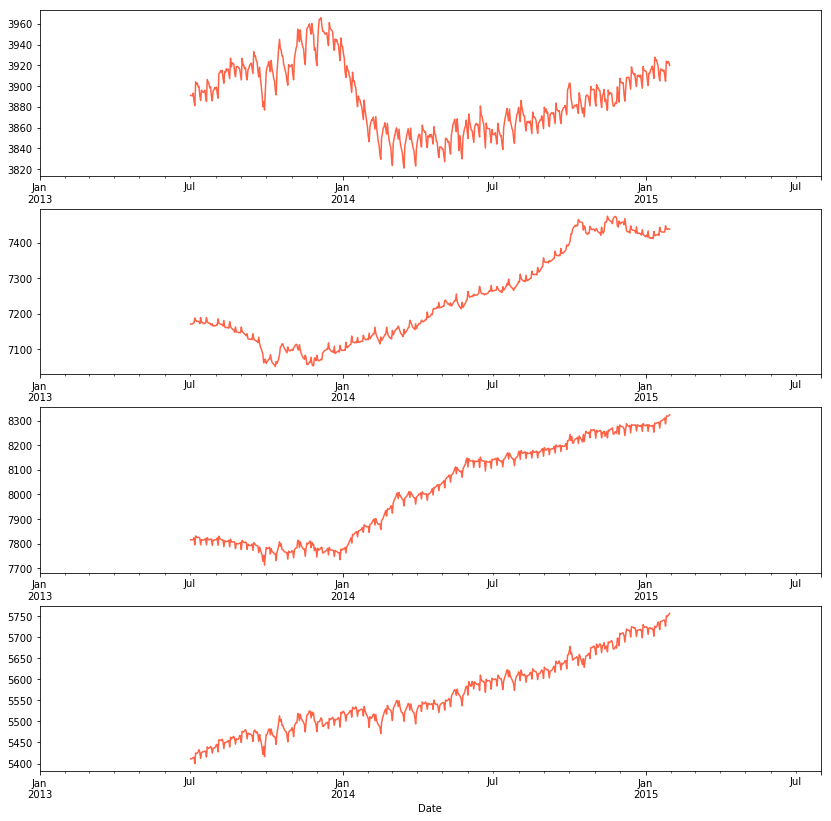

In [33]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (14, 14))

# monthly
decomposition_a = seasonal_decompose(sales_a, model = 'additive', freq = 365)
decomposition_a.trend.plot(color = 'tomato', ax = ax1)

decomposition_b = seasonal_decompose(sales_b, model = 'additive', freq = 365)
decomposition_b.trend.plot(color = 'tomato', ax = ax2)

decomposition_c = seasonal_decompose(sales_c, model = 'additive', freq = 365)
decomposition_c.trend.plot(color = 'tomato', ax = ax3)

decomposition_d = seasonal_decompose(sales_d, model = 'additive', freq = 365)
decomposition_d.trend.plot(color = 'tomato', ax = ax4)

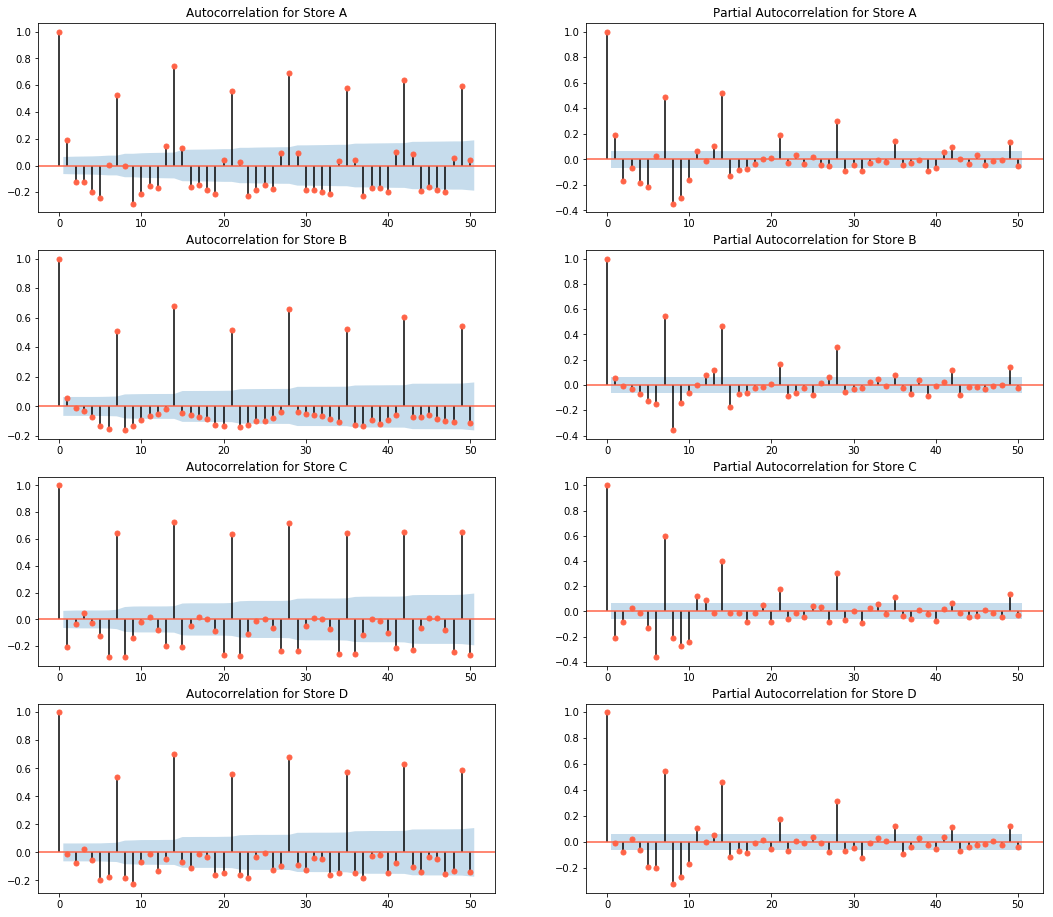

In [34]:
# figure for subplots
plt.figure(figsize = (18, 16))

# acf and pacf for A
plt.subplot(421); plot_acf(sales_a, lags = 50, ax = plt.gca(), color = 'tomato', title='Autocorrelation for Store A')
plt.subplot(422); plot_pacf(sales_a, lags = 50, ax = plt.gca(), color = 'tomato',title='Partial Autocorrelation for Store A')

# acf and pacf for B
plt.subplot(423); plot_acf(sales_b, lags = 50, ax = plt.gca(), color = 'tomato',title='Autocorrelation for Store B')
plt.subplot(424); plot_pacf(sales_b, lags = 50, ax = plt.gca(), color = 'tomato',title='Partial Autocorrelation for Store B')

# acf and pacf for C
plt.subplot(425); plot_acf(sales_c, lags = 50, ax = plt.gca(), color = 'tomato',title='Autocorrelation for Store C')
plt.subplot(426); plot_pacf(sales_c, lags = 50, ax = plt.gca(), color = 'tomato',title='Partial Autocorrelation for Store C')

# acf and pacf for D
plt.subplot(427); plot_acf(sales_d, lags = 50, ax = plt.gca(), color = 'tomato',title='Autocorrelation for Store D')
plt.subplot(428); plot_pacf(sales_d, lags = 50, ax = plt.gca(), color = 'tomato',title='Partial Autocorrelation for Store D')

plt.show()

In [201]:
df['WeeklyMedianSales']=pd.merge(df,df.groupby(['Store','Year','WeekOfYear'])[['Sales']].median(),
         how='left',on=['Store','Year','WeekOfYear'])['Sales_y'].values


In [307]:
ts=base[(base['Store']==13)]
      #&(df['Sales']!=0)&(df['Open']==1)]

In [308]:
ts.loc[ts['Sales']==0,'Sales']=ts[ts['Sales']==0]['WeeklyMedianSales']

In [309]:
train,test=ts[ts.index<='2015-06-20'], ts[ts.index>'2015-06-20']

In [310]:
train.sort_index(ascending = True, inplace=True)
test.sort_index(ascending = True, inplace=True)

In [311]:
train.index = pd.to_datetime(train.index)